<a href="https://colab.research.google.com/github/saysha9/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 WORLD Analysis - May 2, 2020

Source:  the orginal code for the world data is from Our World in Data.  Github
Source: https://github.com/owid/covid-19-data.git

Import world data

In [162]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/37c3c9d8d953eaf69bf00543430dfae41aff7d49/public/data/owid-covid-data.csv").sort_values(by=["total_cases","location"], ascending = False)
df.head(14)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
14854,NaN,World,2020-05-03,3388665,81065,243312,4881,434.734,10.400,31.215,0.626,NaN,NaN,NaN,NaN,NaN
14853,NaN,World,2020-05-02,3307600,91569,238431,5580,424.334,11.747,30.588,0.716,NaN,NaN,NaN,NaN,NaN
14852,NaN,World,2020-05-01,3216031,84729,232851,5532,412.587,10.870,29.873,0.710,NaN,NaN,NaN,NaN,NaN
14851,NaN,World,2020-04-30,3131302,76898,227319,6680,401.717,9.865,29.163,0.857,NaN,NaN,NaN,NaN,NaN
14850,NaN,World,2020-04-29,3054404,72977,220639,6513,391.852,9.362,28.306,0.836,NaN,NaN,NaN,NaN,NaN
14849,NaN,World,2020-04-28,2981427,65432,214126,4897,382.489,8.394,27.470,0.628,NaN,NaN,NaN,NaN,NaN
14848,NaN,World,2020-04-27,2915995,83536,209229,3926,374.095,10.717,26.842,0.504,NaN,NaN,NaN,NaN,NaN
14847,NaN,World,2020-04-26,2832459,101716,205303,6249,363.378,13.049,26.338,0.802,NaN,NaN,NaN,NaN,NaN
14846,NaN,World,2020-04-25,2730743,72833,199054,5406,350.329,9.344,25.537,0.694,NaN,NaN,NaN,NaN,NaN
14845,NaN,World,2020-04-24,2657910,78087,193648,7444,340.985,10.018,24.843,0.955,NaN,NaN,NaN,NaN,NaN


In [124]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

In [125]:
df.shape

(14919, 16)

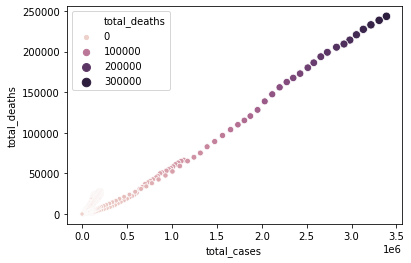

In [126]:
import seaborn as sns
sns.scatterplot (x="total_cases", y="total_deaths", 
                hue="total_deaths",size="total_deaths", data=df)

In [163]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/37c3c9d8d953eaf69bf00543430dfae41aff7d49/public/data/owid-covid-data.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['iso_code', 'location', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'tests_units'],
      dtype='object')


DatetimeIndex(['2020-03-13', '2020-03-20', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-04-01',
               ...
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-10'],
              dtype='datetime64[ns]', name='date', length=14919, freq=None)

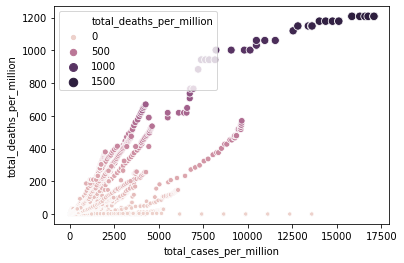

In [164]:
import seaborn as sns
sns.scatterplot (x="total_cases_per_million", y="total_deaths_per_million", 
                hue="total_deaths_per_million",size="total_deaths_per_million", data=df)

In [165]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-05-03
Two days ago 2020-05-01


In [167]:
current_df = df.loc[today].sort_values(by=["total_deaths", "total_cases"], ascending=False)
current_df.head(7)

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
date,,,,,,,,,,,,,,,
2020-05-03,NaN,World,3388665,81065,243312,4881,434.734,10.400,31.215,0.626,NaN,NaN,NaN,NaN,NaN
2020-05-03,USA,United States,1133069,29288,66385,1317,3423.142,88.483,200.557,3.979,NaN,NaN,NaN,NaN,NaN
2020-05-03,ITA,Italy,209328,1900,28710,474,3462.151,31.425,474.845,7.840,NaN,NaN,NaN,NaN,NaN
2020-05-03,GBR,United Kingdom,182260,4806,28131,621,2684.795,70.795,414.386,9.148,NaN,NaN,NaN,NaN,NaN
2020-05-03,ESP,Spain,216582,1366,25100,276,4632.296,29.216,536.843,5.903,NaN,NaN,NaN,NaN,NaN
2020-05-03,FRA,France,130979,794,24760,166,2006.618,12.164,379.327,2.543,NaN,NaN,NaN,NaN,NaN
2020-05-03,BEL,Belgium,49517,485,7765,62,4272.532,41.848,669.996,5.350,NaN,NaN,NaN,NaN,NaN


In [168]:
current_df = df.loc[daybefore].sort_values(by=["total_deaths", "total_cases"], ascending=False)
current_df.head(7)

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
date,,,,,,,,,,,,,,,
2020-05-01,NaN,World,3216031,84729,232851,5532,412.587,10.870,29.873,0.710,NaN,NaN,NaN,NaN,NaN
2020-05-01,USA,United States,1069826,29917,63006,2040,3232.077,90.383,190.349,6.163,6551810.0,305118.0,19.794,0.922,inconsistent units (COVID Tracking Project)
2020-05-01,ITA,Italy,205463,1872,27967,285,3398.227,30.962,462.556,4.714,2053425.0,74208.0,33.962,1.227,tests performed
2020-05-01,GBR,United Kingdom,171253,6032,26771,674,2522.655,88.855,394.352,9.928,762279.0,73191.0,11.229,1.078,people tested
2020-05-01,ESP,Spain,215216,1781,24824,281,4603.080,38.092,530.940,6.010,NaN,NaN,NaN,NaN,NaN
2020-05-01,FRA,France,129581,1139,24376,289,1985.200,17.450,373.444,4.428,NaN,NaN,NaN,NaN,NaN
2020-05-01,BEL,Belgium,48519,660,7594,93,4186.420,56.948,655.242,8.024,347936.0,21165.0,30.021,1.826,units unclear


In [169]:
top_ten_location = list(current_df["location"].head(10).values)
top_ten_location

['World',
 'United States',
 'Italy',
 'United Kingdom',
 'Spain',
 'France',
 'Belgium',
 'Germany',
 'Iran',
 'Brazil']

In [0]:
top_location_df = df[df['location'].isin(top_ten_location)]

In [171]:
set(top_location_df.location.values)

{'Belgium',
 'Brazil',
 'France',
 'Germany',
 'Iran',
 'Italy',
 'Spain',
 'United Kingdom',
 'United States',
 'World'}

<Figure size 1080x360 with 0 Axes>

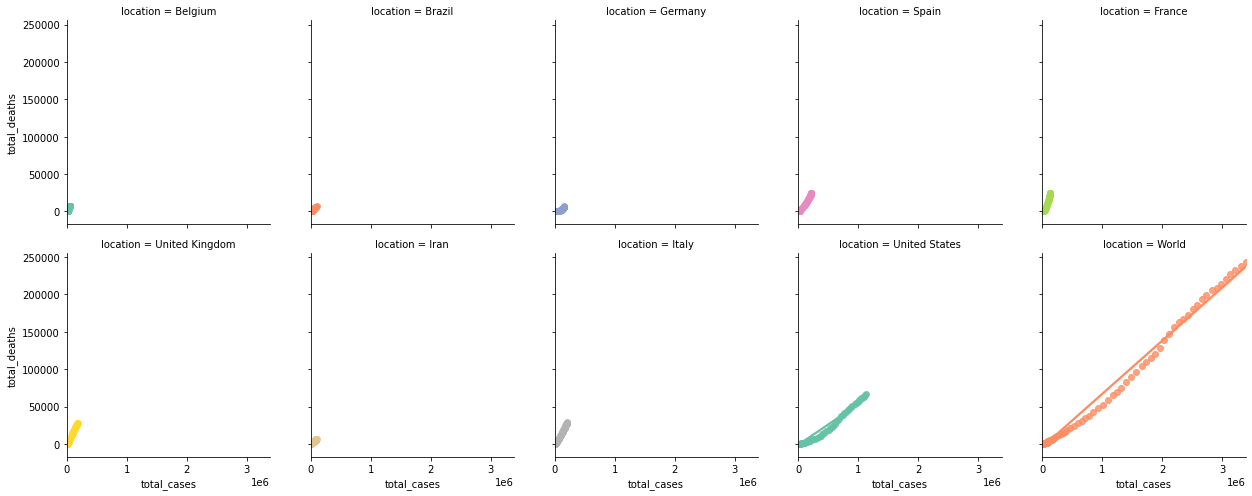

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="total_cases", y="total_deaths",
                    height=3.5,
                    col="location",
                    col_wrap=5,
                    hue="location", 
                    palette="Set2",
                    data=top_location_df)
ax.fig.subplots_adjust(wspace=.2)

**Covid-19 Analysis - May 1, 2020**

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [222]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv").sort_values(by=["date"], ascending=True)
df.head(28)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [204]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [205]:
df.shape

(3369, 5)

In [206]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-05-02', '2020-05-02', '2020-05-02', '2020-05-02',
               '2020-05-02', '2020-05-02', '2020-05-02', '2020-05-02',
               '2020-05-02', '2020-05-02'],
              dtype='datetime64[ns]', name='date', length=3369, freq=None)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

In [207]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Error in callback <function flush_figures at 0x7f66b74f4620> (for post_execute):


KeyboardInterrupt: ignored

Create an index of Dates from the source of the data till latest date

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [208]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-05-03
Two days ago 2020-05-01


Display the top 10 rows of data or head(10), bottom rows is tail()

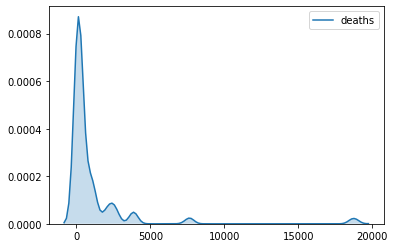

In [209]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

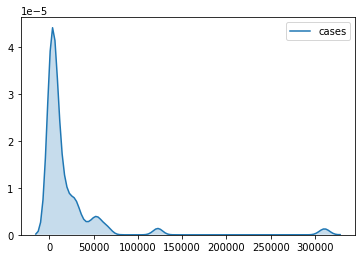

In [210]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [211]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(7)

,state,fips,cases,deaths
date,,,,
2020-05-02,New York,36,313008,18909
2020-05-01,New York,36,308345,18610
2020-05-02,New Jersey,34,123717,7742
2020-05-01,New Jersey,34,121190,7538
2020-05-02,Michigan,26,43191,4020
2020-05-01,Michigan,26,42348,3866
2020-05-02,Massachusetts,25,66263,3846


In [212]:
current_df.shape

(110, 4)

In [213]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New York',
 'New Jersey',
 'New Jersey',
 'Michigan',
 'Michigan',
 'Massachusetts',
 'Massachusetts',
 'Pennsylvania',
 'Pennsylvania']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [187]:
set(top_states_df.state.values)

{'Massachusetts', 'Michigan', 'New Jersey', 'New York', 'Pennsylvania'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

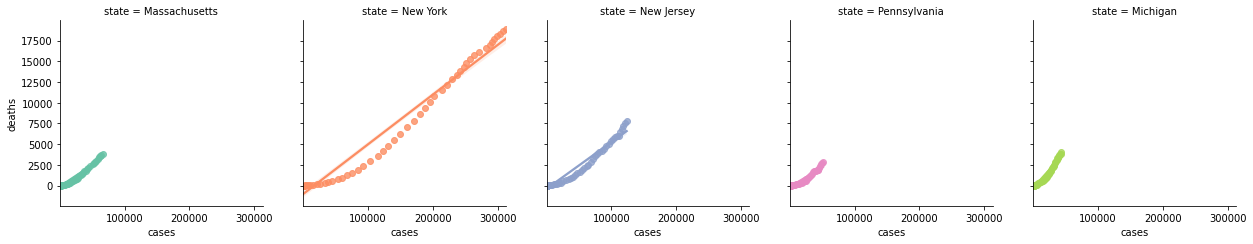

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [190]:
top_states_april_current_df = top_states_df.loc["2020-04-26":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(12)

,state,cases,deaths
date,,,
2020-05-02,New York,313008,18909
2020-05-01,New York,308345,18610
2020-04-30,New York,304401,18321
2020-04-29,New York,299722,18015
2020-04-28,New York,295137,17638
2020-04-27,New York,292027,17303
2020-04-26,New York,288076,16966
2020-05-02,New Jersey,123717,7742
2020-05-01,New Jersey,121190,7538


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [191]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Original Code for ICS 360 HW - Import State Level Data for Hawaii from national dataset

In [214]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.head(10)

,date,cases,deaths
327,2020-03-06,1,0
356,2020-03-07,1,0
390,2020-03-08,2,0
425,2020-03-09,2,0
462,2020-03-10,2,0
503,2020-03-11,2,0
549,2020-03-12,2,0
597,2020-03-13,2,0
648,2020-03-14,4,0
701,2020-03-15,7,0


Import County Level Data for Hawaii from county dataset

In [216]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(12)


,date,county,cases,deaths
101628,2020-04-30,Hawaii,73,0
101629,2020-04-30,Honolulu,399,11
101630,2020-04-30,Kauai,21,0
101631,2020-04-30,Maui,116,5
104482,2020-05-01,Hawaii,73,0
104483,2020-05-01,Honolulu,400,11
104484,2020-05-01,Kauai,21,0
104485,2020-05-01,Maui,116,5
107348,2020-05-02,Hawaii,73,0
107349,2020-05-02,Honolulu,400,11


In [85]:
df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

In [86]:
df.shape

(229, 4)

Create a data frame for Maui County and display data for past 15 days

In [87]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(10)

,date,county,cases,deaths
81861,2020-04-23,Maui,112,5
84662,2020-04-24,Maui,113,5
87473,2020-04-25,Maui,112,5
90291,2020-04-26,Maui,112,5
93111,2020-04-27,Maui,113,5
95942,2020-04-28,Maui,115,5
98783,2020-04-29,Maui,115,5
101631,2020-04-30,Maui,116,5
104485,2020-05-01,Maui,116,5
107351,2020-05-02,Maui,117,5


Visualization of Cases on Maui County over time

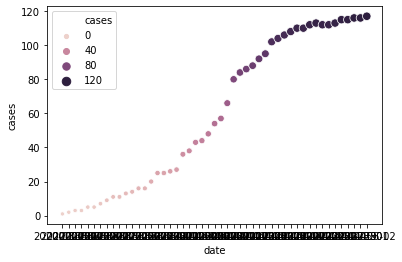

In [88]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Maui_County_df)

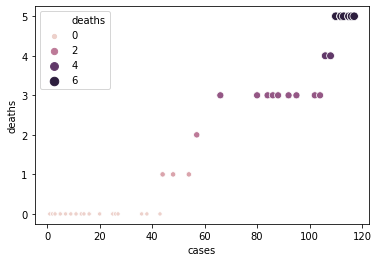

In [89]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

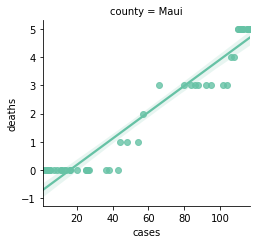

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [91]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(14)

,date,county,cases,deaths
70733,2020-04-19,Honolulu,385,6
73503,2020-04-20,Honolulu,385,6
76280,2020-04-21,Honolulu,385,7
79063,2020-04-22,Honolulu,388,7
81859,2020-04-23,Honolulu,389,7
84660,2020-04-24,Honolulu,392,8
87471,2020-04-25,Honolulu,395,9
90289,2020-04-26,Honolulu,396,9
93109,2020-04-27,Honolulu,396,11
95940,2020-04-28,Honolulu,396,11


Visualization of Cases on Honolulu County over time

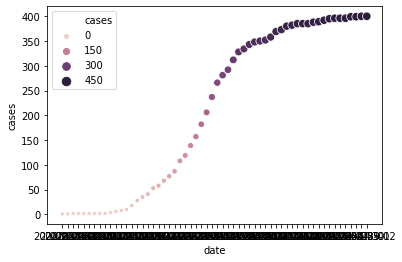

In [92]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Honolulu_County_df)

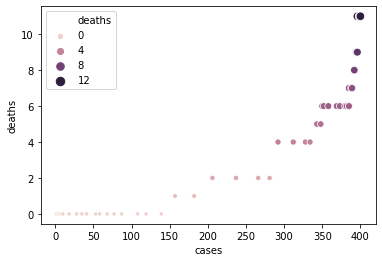

In [93]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

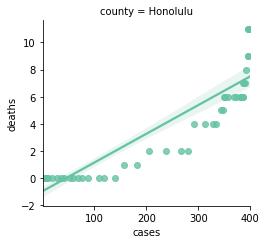

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

Analysis of Hawaii County

In [95]:
Hawaii_County_df = df[df["county"]== "Hawaii"]
Hawaii_County_df.tail(14)

,date,county,cases,deaths
70732,2020-04-19,Hawaii,62,0
73502,2020-04-20,Hawaii,64,0
76279,2020-04-21,Hawaii,64,0
79062,2020-04-22,Hawaii,67,0
81858,2020-04-23,Hawaii,68,0
84659,2020-04-24,Hawaii,69,0
87470,2020-04-25,Hawaii,69,0
90288,2020-04-26,Hawaii,70,0
93108,2020-04-27,Hawaii,70,0
95939,2020-04-28,Hawaii,70,0


Visualization of cases at Hawaii County over time

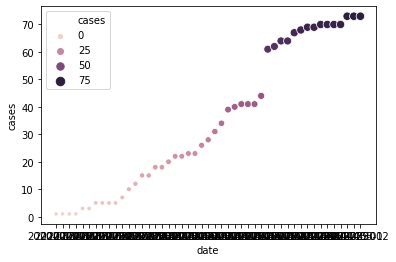

In [96]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Hawaii_County_df)

Kauai County data for the past 15 days


In [220]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail(22)

,date,county,cases,deaths
49021,2020-04-11,Kauai,19,0
51682,2020-04-12,Kauai,21,0
54363,2020-04-13,Kauai,21,0
57056,2020-04-14,Kauai,21,0
59763,2020-04-15,Kauai,21,0
62487,2020-04-16,Kauai,21,0
65222,2020-04-17,Kauai,21,0
67972,2020-04-18,Kauai,21,0
70734,2020-04-19,Kauai,21,0
73504,2020-04-20,Kauai,21,0


graph of cases in Kauai

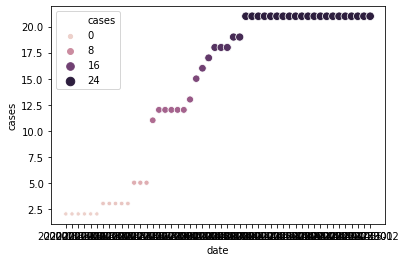

In [98]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Kauai_County_df)

deaths in Kauai County

<Figure size 1080x360 with 0 Axes>

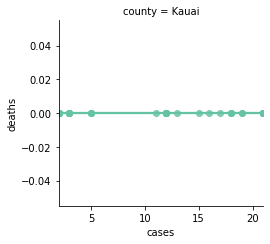

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Kauai_County_df)
ax.fig.subplots_adjust(wspace=.2)